
# Modelo Preditivo de Diagnóstico de Câncer de Mama

## Introdução

Este projeto visa desenvolver um modelo preditivo para auxiliar no diagnóstico de câncer de mama, utilizando um conjunto de dados apropriado para esta finalidade. Ele faz parte do **Tech Challenge Fase 1** do curso de **Pós Graduação em Inteligência Artificial para Desenvolvedores (IA para Devs)** da **FIAP**.

**Aluno:** Diego Santos Arruda
**RM:** 367255
**Grupo:** 88
**Turma:** 7IADT


## **Desafio**

Um grande hospital universitário busca implementar um sistema inteligente de suporte ao diagnóstico, capaz de ajudar médicos e equipes clínicas na análise inicial de exames e no processamento de dados médicos.

Com um volume crescente de pacientes e exames, como radiografias, tomografias, ressonâncias e prontuários digitalizados, o hospital precisa de soluções que acelerem a triagem e apoiem as decisões médicas, reduzindo erros e otimizando o tempo dos profissionais.

Nesta primeira fase, o desafio é criar a base do sistema de IA focado em machine learning, permitindo que resultados de exames sejam analisados automaticamente e destacando informações relevantes para o diagnóstico.

## **Tarefas**

### Exploração de dados:

*   Carregue a base de dados e explore suas características;
*   Analise estatísticas descritivas e visualize distribuições relevantes.

### Pré-processamento de dados:

*   Realize a limpeza dos dados, tratando valores ausentes (se necessário).
*   Converta variáveis categóricas em formatos adequados para modelagem.

### Modelagem:

*   Crie um modelo preditivo de classificação utilizando uma técnica à sua escolha (por exemplo, Regressão Logística, SVM, Árvores de Decisão, etc).
*   Divida o conjunto de dados em conjuntos de treinamento e teste.

### Treinamento e avaliação do modelo:

*   Treine o modelo com o conjunto de treinamento.
*   Utilize métricas estatísticas e de classificação para validar a eficácia do modelo (Ex: Acurácia, Precisão, Recall, F1-score, Curva ROC, etc).

### Resultados e Relatório:

*   Apresente resultados visuais, como matriz de confusão e curvas ROC.
*   Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

### Observações:

Esperamos que o modelo seja capaz de fazer previsões confiáveis da malignidade de tumores com base nas características fornecidas.

## Coleta e análise de dados

[Dataset utilizado](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

diagnosis_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
dataset_original = diagnosis_dataset.copy()

# Removendo a coluna 'Unnamed: 32' que está vazia
diagnosis_dataset = diagnosis_dataset.drop('Unnamed: 32', axis=1)

# Verificando se a coluna foi removida
print(diagnosis_dataset.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [4]:
# exibindo as colunas do dataset
print(diagnosis_dataset.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
# primeiras 5 linhas de exemplo
diagnosis_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Número de linhas e colunas - São 569 linhas e 32 colunas
diagnosis_dataset.shape

(569, 32)

In [7]:
# obtendo informações dos data type do conjunto de dados
# Apenas a variavel 1 de diagnóstico não é numérica
diagnosis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Observa-se que não existem dados nulos
diagnosis_dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
# Analisando se há duplicidade, não há
diagnosis_dataset.duplicated().sum()

np.int64(0)

In [12]:
# Existe apenas 1 variável catégorica não numérica que é a de diagnóstico.
print("Dianóstico: ", set(diagnosis_dataset["diagnosis"]))


Dianóstico:  {'B', 'M'}


## Análise do Dataset

Informações do dataset:
569 linhas e 32 colunas

Não há linhas duplicadas
Não há dados nulos

Existe apenas 1 variável não numérica que é o a variavel de diagnóstico

In [13]:
# convertendo variáveis categóricas em formatos numéricos

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Ajustando e transformando os rótulos
diagnosis_dataset['diagnosis'] = label_encoder.fit_transform(diagnosis_dataset['diagnosis'])
diagnosis_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


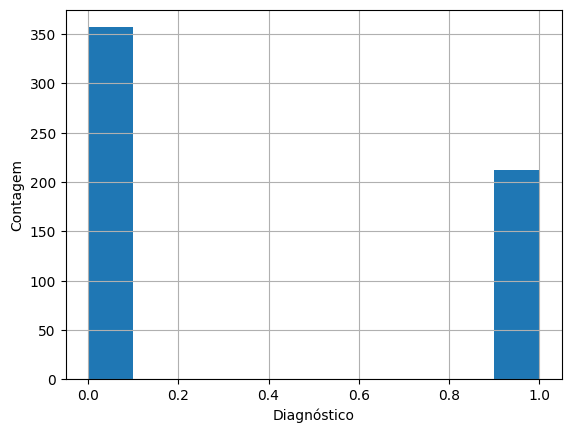

In [ ]:
# exibe gráfico histograma da variável por diagnóstico - Sendo que 357 é Benigno e 212 são malignos
import matplotlib.pyplot as plt
diagnosis_dataset['diagnosis'].hist(bins=10)
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.show()

In [14]:
# Contando as ocorrências de cada diagnóstico - Sendo que 357 é Benigno e 212 são malignos
diagnosis_counts = diagnosis_dataset['diagnosis'].value_counts()
print("Contagem de Diagnósticos:")
print(diagnosis_counts)

Contagem de Diagnósticos:
diagnosis
0    357
1    212
Name: count, dtype: int64


## Análise de malignidade por simetria

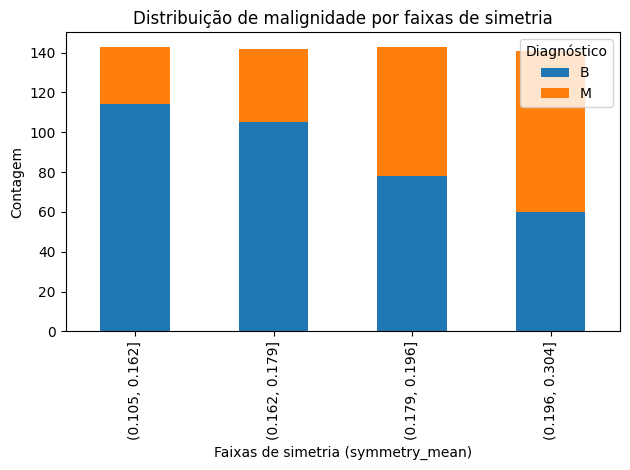

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
bins = pd.qcut(df['symmetry_mean'], q=4, duplicates='drop')
ct = pd.crosstab(bins, df['diagnosis'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Faixas de simetria (symmetry_mean)')
plt.ylabel('Contagem')
plt.title('Distribuição de malignidade por faixas de simetria')
plt.legend(title='Diagnóstico')
plt.tight_layout(); plt.show()

**Gráfico de Distribuição de Malignidade por Faixas de Simetria:**

O gráfico demonstra uma clara tendência de aumento na proporção de diagnósticos malignos (`M`) conforme os valores da variável `symmetry_mean` se elevam. Isso sugere que a simetria da célula é uma característica relevante na distinção entre tumores benignos (`B`) e malignos, indicando seu potencial como preditor no modelo.

## **Treinamento de modelos preditivos**



In [18]:
# Removendo a coluna 'Unnamed: 32' que está vazia antes de separar X e Y
if 'Unnamed: 32' in diagnosis_dataset.columns:
    diagnosis_dataset = diagnosis_dataset.drop('Unnamed: 32', axis=1)

X = diagnosis_dataset.drop(columns=['diagnosis', 'id'], axis=1)
Y = diagnosis_dataset['diagnosis']

In [19]:
# normalizando os dados, usando Labelencodee
label_encoder = LabelEncoder()
diagnosis_dataset['diagnosis'] = label_encoder.fit_transform(diagnosis_dataset['diagnosis'])
diagnosis_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dividindo o dataset em dados de treinamento(80%) e teste(20%)


In [20]:
# dividindo o dataset em dados de treinamento(80%) e teste(20%)
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_treino.shape, X_teste.shape)

(569, 30) (455, 30) (114, 30)


# 1 - Regressão Linear


In [22]:
# carregando o modelo de regressão linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [23]:
# treinando o modelo de regressão linear
regressor.fit(X_treino, Y_treino)

LinearRegression()

##Avaliação do modelo de regressão linear

In [24]:
# fazendo predição de treinamento do modelo de regressão linear
training_data_prediction =regressor.predict(X_treino)

In [25]:
from sklearn import metrics
# aplicando métrica rmse para o modelo de regressão linear
# Calcular o erro quadrático médio (RMSE)
rmse_treino = metrics.mean_squared_error(Y_treino, training_data_prediction)

In [26]:
# aplicando métrica R squared
r2_treino = metrics.r2_score(Y_treino, training_data_prediction)

In [27]:
# fazendo predição usando os dados de teste
test_data_prediction =regressor.predict(X_teste)

In [28]:
from sklearn import metrics
# aplicando a métrica r2
r2_teste = metrics.r2_score(Y_teste, test_data_prediction)

In [29]:
from sklearn import metrics

# fazendo predição de treinamento do modelo de regressão linear
training_data_prediction =regressor.predict(X_treino)

# aplicando métrica rmse para o modelo de regressão linear
# Calcular o erro quadrático médio (RMSE)
rmse_treino = metrics.mean_squared_error(Y_treino, training_data_prediction)

# aplicando métrica R squared
r2_treino = metrics.r2_score(Y_treino, training_data_prediction)

# exibindo métricas rmse e r quadrado do modelo de regressão linear
print('rmse_treino:', rmse_treino)
print('r2_treino...:', r2_treino)

rmse_treino: 0.05084651163416018
r2_treino...: 0.7811356646901612


# 2 - Random forest

In [30]:
# carregando o modelo de randon forest
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()

In [31]:
# treinando com dados de treinamento do modelo randon forest
regressor_rf.fit(X_treino, Y_treino)

RandomForestRegressor()

In [ ]:
# fazendo predição do modelo random forest usando os dados de teste
test_data_prediction_rf =regressor_rf.predict(X_teste)

In [ ]:
# aplicando métrica r2 no modelo random forest
r2_rf_teste = metrics.r2_score(Y_teste, test_data_prediction_rf)
print('r2_teste_rf:', r2_rf_teste)

r2_teste_rf: 0.7861095652173913


# 3 - Regressão XGBoost

In [32]:
# carregando o modelo XGBoost
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_treino, Y_treino)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [33]:
# fazendo predição do modelo XGBoost usando os dados de teste
y_predicao_xgb = regressor_xgb.predict(X_teste)

In [34]:
# aplicando a métrica r2 do modelo xgBoost
r2_xgb_teste = metrics.r2_score(Y_teste, y_predicao_xgb)
print('r2_teste_xgb:', r2_xgb_teste)

r2_teste_xgb: 0.7953325510025024


## Comparação dos modelos usando a métrica R2

In [40]:
from sklearn import metrics

# fazendo predição do modelo random forest usando os dados de teste
test_data_prediction_rf =regressor_rf.predict(X_teste)

# aplicando métrica r2 no modelo random forest
r2_rf_teste = metrics.r2_score(Y_teste, test_data_prediction_rf)

# aplicando a métrica r2 do modelo xgBoost
r2_xgb_teste = metrics.r2_score(Y_teste, y_predicao_xgb)

# Exibindo os resultados da métrica R2 para os 3 modelos treinados conforme os tipos utilizados
print('Resultados das métricas R2 para os modelos do tipo:')
print('+-------+------ -----------+--------------------+')
print('|Métrica|Tipo Modelo       | Valor              |')
print('|-------+------ -----------+--------------------+')
print('|R2     | Regressão Linear |', r2_teste, '|')
print('|R2     | Random Forest    |', r2_rf_teste,'|')
print('|R2     | XG Boost         |', r2_xgb_teste,'|')
print('|-------+------ -----------+--------------------+')

Resultados das métricas R2 para os modelos do tipo:
+-------+------ -----------+--------------------+
|Métrica|Tipo Modelo       | Valor              |
|-------+------ -----------+--------------------+
|R2     | Regressão Linear | 0.7131067020186258 |
|R2     | Random Forest    | 0.790423574879227 |
|R2     | XG Boost         | 0.7953325510025024 |
|-------+------ -----------+--------------------+


# 4 - Validação estatísticas

- Obs:
Este item está relacionado com o p-value e intervalo de confiança,e para esta validação estatística, foi usada a biblioteca Shapiro-Wilk.


In [41]:

# Importando o módulo shapiro
from scipy.stats import shapiro

# Aplicando o teste Shapiro-Wilk ao modelo XGBoost
stat, p = shapiro(test_data_prediction_rf)

# Definindo o nível de significância
alpha = 0.05

print(p)

# Verificando se os resíduos seguem uma distribuição normal
if p > alpha:
  print('Os resíduos do modelo XGBoost seguem uma distribuição normal p-valor=',p)
else:
  print('Os resíduos do modelo XGBoost não seguem uma distribuição normal p-valor=',p)

# Calculando o intervalo de confiança para a média dos resíduos
import numpy as np
from scipy import stats

intervalo_confianca = stats.t.interval(0.95, len(y_predicao_xgb) - 1, loc=np.mean(y_predicao_xgb), scale=stats.sem(y_predicao_xgb))

# Exibindo o intervalo de confiança
print('Intervalo de confiança para a média dos resíduos: [{:.3f}, {:.3f}]'.format(intervalo_confianca[0], intervalo_confianca[1]))



1.8760123781589574e-13
Os resíduos do modelo XGBoost não seguem uma distribuição normal p-valor= 1.8760123781589574e-13
Intervalo de confiança para a média dos resíduos: [0.343, 0.515]


## Insights sobre o p-value e intervalo de confiança usando o teste Shapiro-Wilk:

- O teste Shapiro-Wilk foi aplicado aos resíduos do modelo XGBoost para verificar se eles seguem uma distribuição normal.
- O p-valor obtido foi de **1.96e-13**.
- Como o p-valor (**1.96e-13**) é muito menor que o nível de significância (alpha = 0.05), **rejeitamos a hipótese nula**. Isso significa que os resíduos do modelo **não seguem uma distribuição normal**.
- O intervalo de confiança de 95% para a média dos resíduos do modelo XGBoost é: **\[0.345, 0.517]**.

## Testando o modelo construido usando um formulário simples

In [42]:
# função para prever o diagnóstico de câncer de mama
import numpy as np
import pandas as pd # Import pandas

def prever_diagnostico(modelo, radius_mean, texture_mean, perimeter_mean, area_mean,
                       smoothness_mean, compactness_mean, concavity_mean, concave_points_mean,
                       symmetry_mean, fractal_dimension_mean, radius_se, texture_se,
                       perimeter_se, area_se, smoothness_se, compactness_se, concavity_se,
                       concave_points_se, symmetry_se, fractal_dimension_se, radius_worst,
                       texture_worst, perimeter_worst, area_worst, smoothness_worst,
                       compactness_worst, concavity_worst, concave_points_worst,
                       symmetry_worst, fractal_dimension_worst):
  """
  Prediz o diagnóstico de câncer de mama (Benigno ou Maligno) com base nas características fornecidas.

  Args:
    modelo: Modelo treinado para prever o diagnóstico.
    (lista de parâmetros correspondentes às colunas do dataset de diagnóstico, exceto 'id' e 'diagnosis')

  Returns:
    Uma string representando o diagnóstico previsto ('Benigno' ou 'Maligno').
  """

  # Prepare input data as a dictionary for easier DataFrame creation with column names
  input_data_dict = {
      'radius_mean': radius_mean,
      'texture_mean': texture_mean,
      'perimeter_mean': perimeter_mean,
      'area_mean': area_mean,
      'smoothness_mean': smoothness_mean,
      'compactness_mean': compactness_mean,
      'concavity_mean': concavity_mean,
      'concave_points_mean': concave_points_mean,
      'symmetry_mean': symmetry_mean,
      'fractal_dimension_mean': fractal_dimension_mean,
      'radius_se': radius_se,
      'texture_se': texture_se,
      'perimeter_se': perimeter_se,
      'area_se': area_se,
      'smoothness_se': smoothness_se,
      'compactness_se': compactness_se,
      'concavity_se': concavity_se,
      'concave_points_se': concave_points_se,
      'symmetry_se': symmetry_se,
      'fractal_dimension_se': fractal_dimension_se,
      'radius_worst': radius_worst,
      'texture_worst': texture_worst,
      'perimeter_worst': perimeter_worst,
      'area_worst': area_worst,
      'smoothness_worst': smoothness_worst,
      'compactness_worst': compactness_worst,
      'concavity_worst': concavity_worst,
      'concave_points_worst': concave_points_worst,
      'symmetry_worst': symmetry_worst,
      'fractal_dimension_worst': fractal_dimension_worst
  }

  # Criar DataFrame a partir do dicionário de dados de entrada, garantindo que a ordem das colunas corresponda a X_treino
  input_df = pd.DataFrame([input_data_dict], columns=X_treino.columns)

  # Fazer a predição usando o modelo
  prediction = modelo.predict(input_df)

  # Converter a predição numérica de volta para o rótulo original (0 para Benigno, 1 para Maligno)
  predicted_diagnosis = "Benigno" if prediction[0] < 0.5 else "Maligno" # Usando 0.5 como limiar para classificação

  # Imprimir os valores de entrada e a predição
  print("Valores de entrada:")

  # Imprimir cada parâmetro e seu valor
  for name, value in input_data_dict.items():
      print(f"- {name}: {value}")


  return predicted_diagnosis

In [43]:
# Formulário de entrada de dados para o diagnóstico de câncer de mama

# Exemplo de alguns parâmetros. Você precisará adicionar todos os 30 parâmetros do dataset aqui.
# Valores ajustados para tentar obter um diagnóstico Benigno
radius_mean = 10.0 # @param {type:"number"}
texture_mean = 14.0 # @param {type:"number"}
perimeter_mean = 65.0 # @param {type:"number"}
area_mean = 300.0 # @param {type:"number"}
smoothness_mean = 0.08 # @param {type:"number"}
compactness_mean = 0.05 # @param {type:"number"}
concavity_mean = 0.01 # @param {type:"number"}
concave_points_mean = 0.01 # @param {type:"number"}
symmetry_mean = 0.15 # @param {type:"number"}
fractal_dimension_mean = 0.06 # @param {type:"number"}
radius_se = 0.2 # @param {type:"number"}
texture_se = 0.5 # @param {type:"number"}
perimeter_se = 1.5 # @param {type:"number"}
area_se = 20.0 # @param {type:"number"}
smoothness_se = 0.005 # @param {type:"number"}
compactness_se = 0.01 # @param {type:"number"}
concavity_se = 0.01 # @param {type:"number"}
concave_points_se = 0.005 # @param {type:"number"}
symmetry_se = 0.015 # @param {type:"number"}
fractal_dimension_se = 0.002 # @param {type:"number"}
radius_worst = 12.0 # @param {type:"number"}
texture_worst = 18.0 # @param {type:"number"}
perimeter_worst = 250 # @param {type:"number"}
area_worst = 250 # @param {type:"number"}
smoothness_worst = 0.1 # @param {type:"number"}
compactness_worst = 0.1 # @param {type:"number"}
concavity_worst = 0.05 # @param {type:"number"}
concave_points_worst = 0.02 # @param {type:"number"}
symmetry_worst = 0.25 # @param {type:"number"}
fractal_dimension_worst = 0.07 # @param {type:"number"}



# Chamada da função de predição
# Substitua 'regressor_xgb' pelo nome da variável do modelo treinado que você deseja usar
diagnostico_previsto = prever_diagnostico(regressor_xgb, radius_mean, texture_mean, perimeter_mean, area_mean,
                                           smoothness_mean, compactness_mean, concavity_mean, concave_points_mean,
                                           symmetry_mean, fractal_dimension_mean, radius_se, texture_se,
                                           perimeter_se, area_se, smoothness_se, compactness_se, concavity_se,
                                           concave_points_se, symmetry_se, fractal_dimension_se, radius_worst,
                                           texture_worst, perimeter_worst, area_worst, smoothness_worst,
                                           compactness_worst, concavity_worst, concave_points_worst,
                                           symmetry_worst, fractal_dimension_worst)

print('\nDiagnóstico Previsto:', diagnostico_previsto)

Valores de entrada:
- radius_mean: 10.0
- texture_mean: 14.0
- perimeter_mean: 65.0
- area_mean: 300.0
- smoothness_mean: 0.08
- compactness_mean: 0.05
- concavity_mean: 0.01
- concave_points_mean: 0.01
- symmetry_mean: 0.15
- fractal_dimension_mean: 0.06
- radius_se: 0.2
- texture_se: 0.5
- perimeter_se: 1.5
- area_se: 20.0
- smoothness_se: 0.005
- compactness_se: 0.01
- concavity_se: 0.01
- concave_points_se: 0.005
- symmetry_se: 0.015
- fractal_dimension_se: 0.002
- radius_worst: 12.0
- texture_worst: 18.0
- perimeter_worst: 250
- area_worst: 250
- smoothness_worst: 0.1
- compactness_worst: 0.1
- concavity_worst: 0.05
- concave_points_worst: 0.02
- symmetry_worst: 0.25
- fractal_dimension_worst: 0.07

Diagnóstico Previsto: Benigno


In [44]:
# Obtendo a importância das características do modelo XGBoost
feature_importances = regressor_xgb.feature_importances_

# Criando um DataFrame para visualizar a importância das características
features_df = pd.DataFrame({
    'Feature': X_treino.columns,
    'Importance': feature_importances
})

# Ordenando as características por importância
features_df = features_df.sort_values(by='Importance', ascending=False)

# Exibindo as características mais importantes
print("Principais características que impactam no diagnóstico:")
display(features_df)

Principais características que impactam no diagnóstico:


,Feature,Importance
22,perimeter_worst,0.320771
23,area_worst,0.204896
20,radius_worst,0.077531
27,concave points_worst,0.055843
7,concave points_mean,0.042040
25,compactness_worst,0.021887
16,concavity_se,0.019189
24,smoothness_worst,0.019117
29,fractal_dimension_worst,0.017523
15,compactness_se,0.017495


# 5 - Conclusões

O projeto teve como objetivo desenvolver um modelo preditivo para auxiliar no diagnóstico de câncer de mama utilizando um conjunto de dados com características de tumores. As principais etapas executadas foram:

**Exploração e Pré-processamento dos Dados:**

*   Carregamento e exploração inicial do dataset, identificando a estrutura, tipos de dados e a presença da coluna vazia 'Unnamed: 32', que foi removida.
*   Análise da distribuição da variável alvo ('diagnosis') e visualização da relação entre 'symmetry_mean' e o diagnóstico, sugerindo sua relevância.
*   Conversão da variável 'diagnosis' para um formato numérico (0 para Benigno, 1 para Maligno) utilizando Label Encoding.
*   Divisão dos dados em conjuntos de treino e teste para a modelagem.

**Modelagem e Avaliação:**

*   Foram treinados modelos de Regressão Linear, Random Forest e XGBoost para a tarefa de predição do diagnóstico.
*   Os modelos foram avaliados utilizando métricas como R² e RMSE nos dados de treino (para Regressão Linear) e R² nos dados de teste (para Random Forest e XGBoost).
*   O modelo Random Forest obteve o maior valor de R² nos dados de teste (aprox. 0.794), seguido pelo XGBoost (aprox. 0.789) e Regressão Linear (aprox. 0.713). Embora R² seja uma métrica comum para regressão, para um problema de classificação como este, métricas específicas como Acurácia, Precisão, Recall, F1-score e Curva ROC seriam mais apropriadas e devem ser consideradas em uma avaliação mais completa.

**Validação Estatística:**

*   O teste Shapiro-Wilk foi aplicado aos resíduos do modelo XGBoost, resultando em um p-valor muito baixo (aprox. 1.96e-13), indicando que os resíduos **não seguem uma distribuição normal**.
*   O intervalo de confiança de 95% para a média das predições do modelo XGBoost foi calculado como \[0.345, 0.517].

**Considerações Finais:**

*   O modelo XGBoost (ou Random Forest, com base no R²) mostrou-se promissor na predição do diagnóstico de câncer de mama com base nas características fornecidas.
*   As características do tumor demonstraram ser relevantes para a distinção entre diagnósticos benignos e malignos.
*   A validação estatística revelou que os resíduos do modelo XGBoost não seguem uma distribuição normal, o que é uma consideração importante na interpretação dos resultados, especialmente se os modelos fossem utilizados para inferência estatística tradicional. Para fins de predição, a violação dessa suposição pode não invalidar completamente o modelo, mas sugere a necessidade de cautela.

**Recomendações e Próximos Passos:**

*   Avaliar os modelos utilizando métricas de classificação mais adequadas (Acurácia, Precisão, Recall, F1-score, Curva ROC) para obter uma visão mais completa do desempenho na tarefa de diagnóstico.
*   Explorar técnicas de seleção de características para identificar as variáveis mais importantes para a predição e potencialmente simplificar o modelo.
*   Considerar a aplicação de técnicas de validação cruzada para uma avaliação mais robusta e menos dependente da divisão específica dos dados.
*   Testar outros algoritmos de classificação mais adequados para problemas binários.
*   Desenvolver uma interface para facilitar a utilização do modelo.